In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


from transformers import pipeline


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC


In [10]:
# Load the dataset (ISO to read)
df = pd.read_csv('job_preferences.csv', encoding='ISO-8859-1')

# Preview the first few rows of the dataset
df.head()


,industry,experience_level,job_title,job_description,skills
0,Software Tester,Entry Level,Quality Assurance Analyst,A Quality Assurance Analyst tests software and...,Test software applications and systems to iden...
1,Teacher,Entry Level,Classroom Teacher,A Classroom Teacher educates students in a spe...,"Plan and deliver engaging lessons, adapting te..."
2,UX/UI Designer,Entry Level,User Interface Designer,User Interface Designers focus on the visual a...,Create visually appealing user interfaces (UI)...
3,UX/UI Designer,Entry Level,Interaction Designer,Interaction Designers specialize in designing ...,"Work on interaction design, defining how users..."
4,Wedding Planner,Entry Level,Wedding Consultant,A Wedding Consultant assists couples in planni...,Offer expert advice and guidance to couples pl...


In [13]:
# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the 'job_description' column (if it's the main text field)
X = vectorizer.fit_transform(df['job_description'])

# Target variable 
y = df['job_title']


In [14]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the resulting datasets
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (864, 1372)
Test set shape: (216, 1372)


In [18]:
# Example text data
text_data = ["This is an example.", "Text preprocessing is important."]

# Step 1: Lowercase the text before vectorization
text_data = [text.lower() for text in text_data]

# Step 2: Apply TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')

# Convert the preprocessed text data into a sparse matrix
X = vectorizer.fit_transform(text_data)

# Step 3: Fit a model, for example, LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Example labels for classification (this could be a binary or multiclass problem)
y_train = [0, 1]  # Sample labels

# Step 4: Create a pipeline with the vectorizer and classifier
model = make_pipeline(TfidfVectorizer(stop_words='english'), LogisticRegression())

# Train the model
model.fit(text_data, y_train)


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(stop_words='english')),
                ('logisticregression', LogisticRegression())])

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



C:\laragon\www\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\laragon\www\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\laragon\www\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\laragon\www\venv\lib\site-packages\sklearn\metrics\_classifi

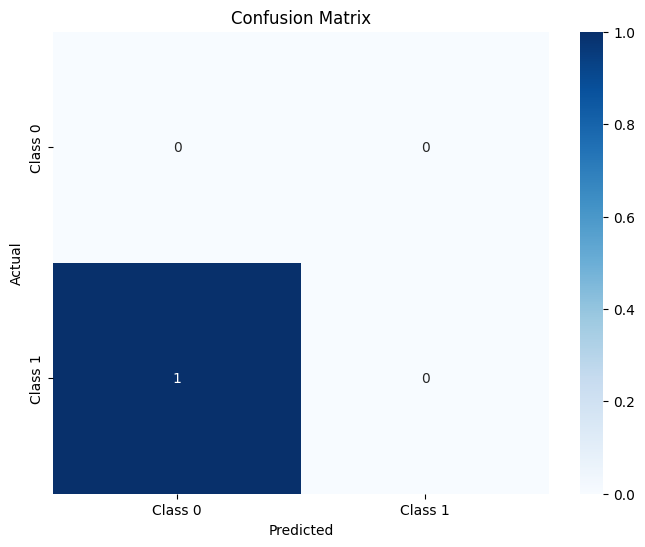

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
X_train = ["Job description text 1", "Job description text 2"]  # Example texts
y_train = [1, 0]  # Labels (e.g., 1 for relevant, 0 for irrelevant)
X_test = ["Test job description"]  # Example test text
y_test = [1]  # Actual label for test data

# Define the model pipeline
model = make_pipeline(TfidfVectorizer(stop_words='english'), LogisticRegression())

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate and plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


C:\laragon\www\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\laragon\www\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\laragon\www\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\laragon\www\venv\lib\site-packages\sklearn\metrics\_classifi

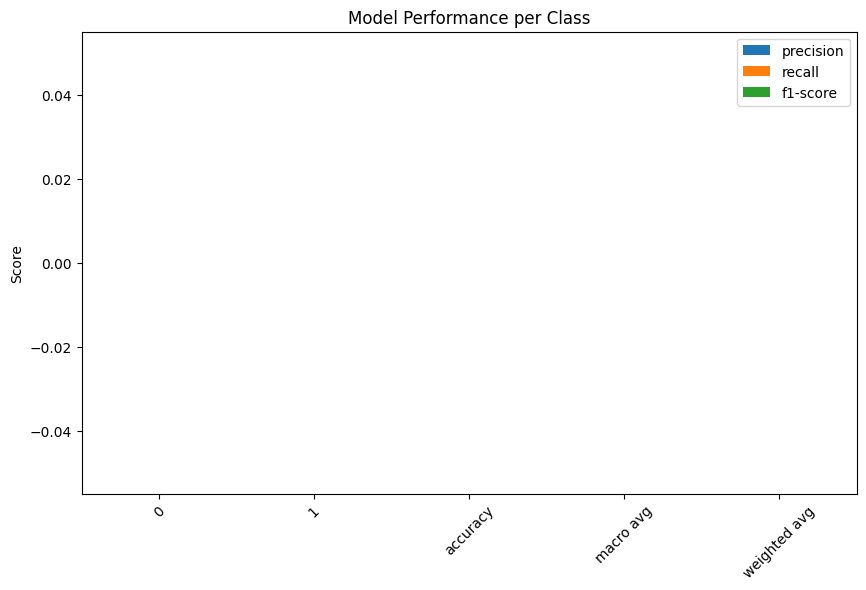

In [22]:
# Plotting a bar chart for classification report metrics
metrics = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(metrics).transpose()

# Plot precision, recall, f1-score for each class
metrics_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance per Class')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()



- We trained a classification model (Logistic Regression) to predict job preferences based on job descriptions.